In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
import seaborn as sns
from datetime import datetime

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/BAJAJFINSV.csv')

In [ ]:
df=data
pd.set_option('display.max_rows', None)

In [ ]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 2008-05-26 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Deliverable Volume  3201 non-null   int64  
 13  %Deliverble         3201 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 504.2+ KB


Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
df.head(20)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
5,2008-06-02,BAJAJFINSV,EQ,644.00,650.00,699.00,622.00,687.00,686.95,670.51,2247399,1.506913e+14,NaN,351112,0.1562
6,2008-06-03,BAJAJFINSV,EQ,686.95,672.00,689.80,632.55,670.55,672.05,665.87,2299383,1.531082e+14,NaN,391772,0.1704
7,2008-06-04,BAJAJFINSV,EQ,672.05,674.00,674.00,566.60,595.00,598.95,602.36,2832725,1.706317e+14,NaN,735765,0.2597
8,2008-06-05,BAJAJFINSV,EQ,598.95,603.00,639.80,572.30,631.50,631.85,610.65,1344712,8.211522e+13,NaN,167819,0.1248
9,2008-06-06,BAJAJFINSV,EQ,631.85,639.25,642.90,608.05,635.00,630.90,628.44,794722,4.994326e+13,NaN,65497,0.0824


In [ ]:
df.shape

(3201, 14)

In [ ]:
#df = df.drop("Trades", axis=1)    for delete column

In [ ]:
df1=pd.DataFrame(df)
df1

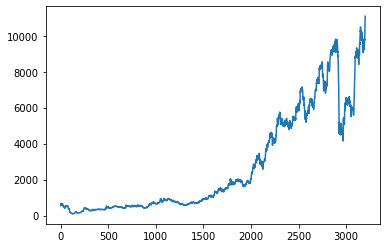

In [ ]:

df1['VWAP'].plot()

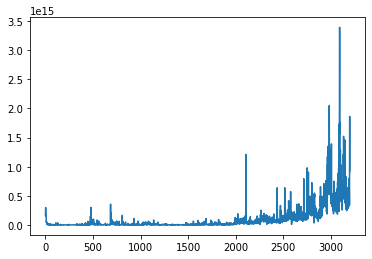

In [ ]:
df1['Turnover'].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['VWAP'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
sort=df1.iloc[:80]
sort

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
5,2008-06-02,BAJAJFINSV,EQ,644.00,650.00,699.00,622.00,687.00,686.95,670.51,2247399,1.506913e+14,NaN,351112,0.1562
6,2008-06-03,BAJAJFINSV,EQ,686.95,672.00,689.80,632.55,670.55,672.05,665.87,2299383,1.531082e+14,NaN,391772,0.1704
7,2008-06-04,BAJAJFINSV,EQ,672.05,674.00,674.00,566.60,595.00,598.95,602.36,2832725,1.706317e+14,NaN,735765,0.2597
8,2008-06-05,BAJAJFINSV,EQ,598.95,603.00,639.80,572.30,631.50,631.85,610.65,1344712,8.211522e+13,NaN,167819,0.1248
9,2008-06-06,BAJAJFINSV,EQ,631.85,639.25,642.90,608.05,635.00,630.90,628.44,794722,4.994326e+13,NaN,65497,0.0824


In [ ]:
x = sort['Date']
h = sort['High']
l = sort['Low']

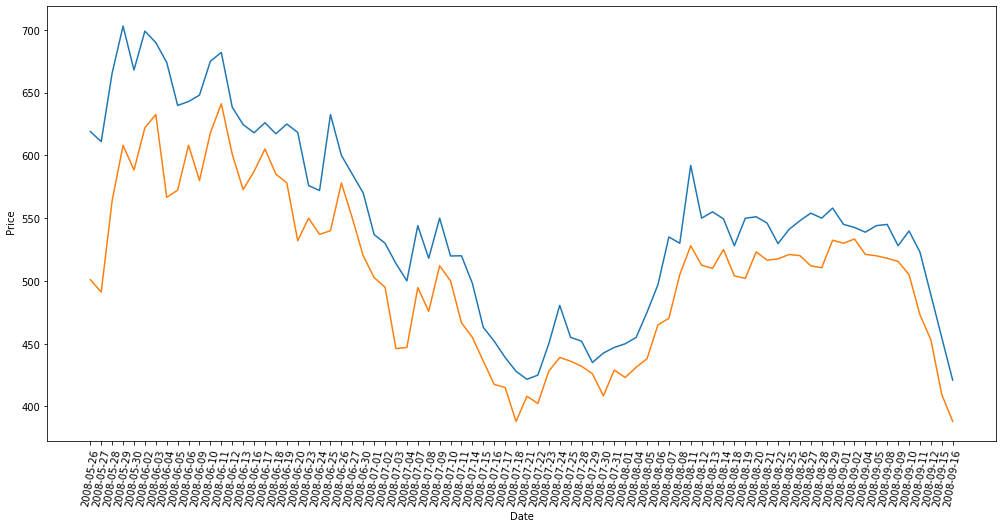

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(x,h,l)
plt.xticks(rotation=80)
plt.xlabel('Date')
plt.ylabel(' Price')
plt.show()

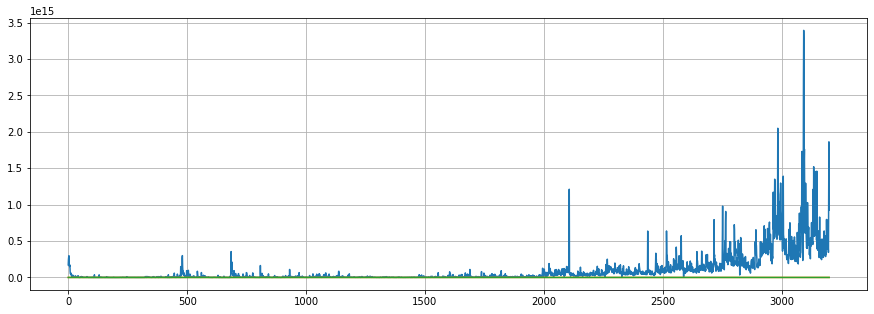

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df1['Turnover'])
plt.plot(df1['VWAP'])
plt.plot(df1['Volume'])
plt.grid()
plt.show()

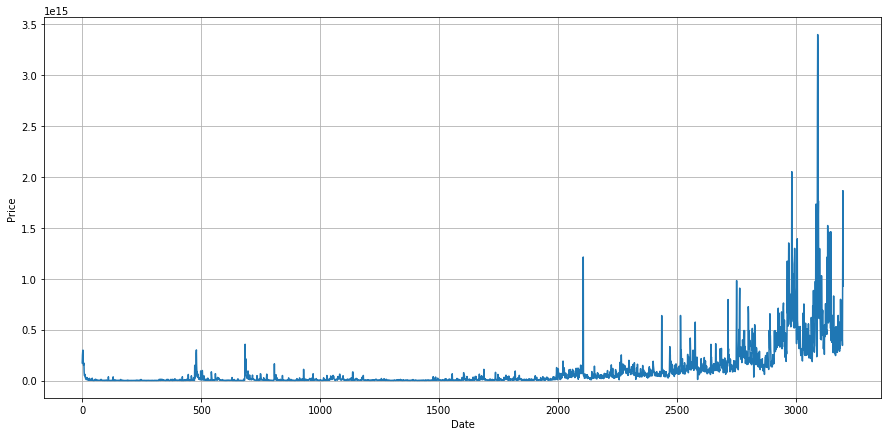

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Turnover'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.046908,0.046926,0.038296,0.501496
1,0.038202,0.046208,0.037377,0.693436
2,0.043609,0.051085,0.044140,0.731645
3,0.052099,0.054422,0.048221,0.721048
4,0.050793,0.051299,0.046394,0.487499


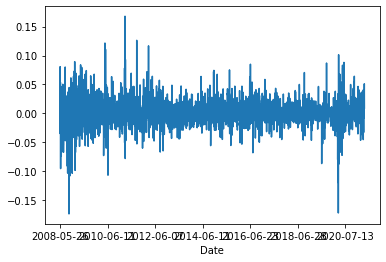

In [ ]:
stock_name = 'BAJFINANCE'
df = pd.read_csv('/content/drive/MyDrive/BAJAJFINSV.csv')
df.set_index("Date", drop=False, inplace=True)

df.VWAP.pct_change().plot()

In [ ]:
data1=pd.read_csv(r'/content/drive/MyDrive/supermarket_sales - Sheet1.csv')

In [ ]:
data1.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
df2=pd.DataFrame(data1)
df2

In [ ]:
sort=data1.iloc[:80]
sort

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
sort.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
x = sort['Invoice ID']
h = sort['Date']
l = sort['Total']

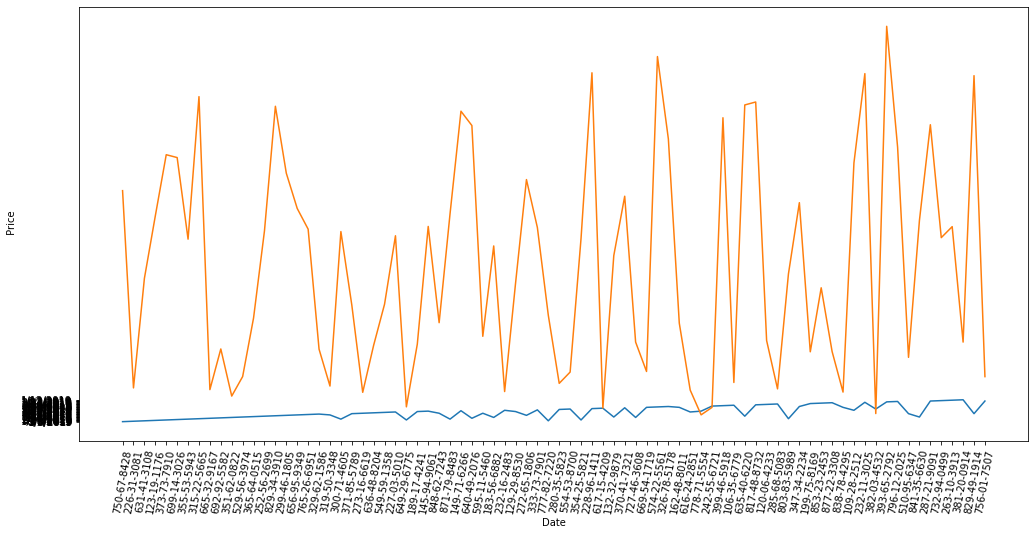

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(x,h,l)
plt.xticks(rotation=80)
plt.xlabel('Date')
plt.ylabel(' Price')
plt.show()